# Analysis of the results for the Ximantis dataset
# `ximantis_smooth_3_truncated`
## Setup

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
timestamp = 12
day_length = 252-58
train_time = 227
total_number_of_cameras = 42
truncation_t1 = 58
truncation_t2 = 252

## Results

In [3]:
result = torch.tensor(np.load("STGAN/ximantis_smooth_3_truncated/result/2024-07-04_12-11-17/result.npy"), dtype=torch.float)

In [4]:
result.shape

torch.Size([1940, 42, 3])

In [5]:
camera_num = 19
days = 10

<Axes: >

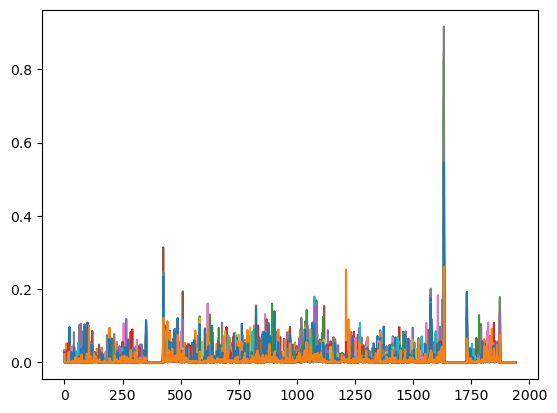

In [6]:
pd.DataFrame(result[:days*day_length, :, 0].numpy()).plot(legend=False)

<Axes: >

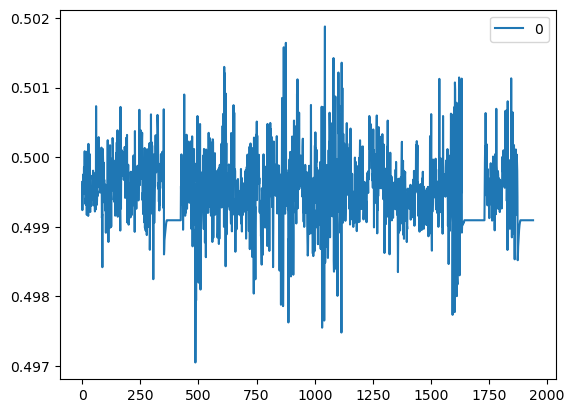

In [7]:
pd.DataFrame(result[:days*day_length, camera_num, 1].numpy()).plot()

<Axes: >

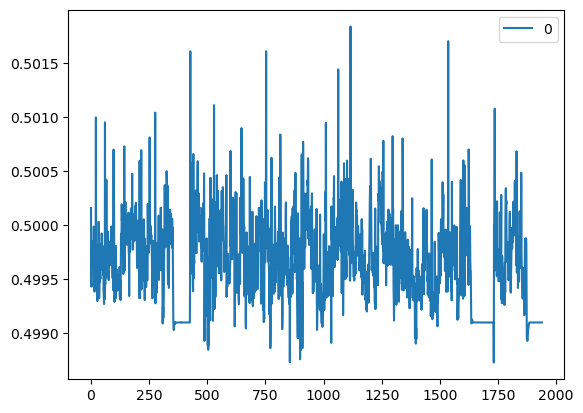

In [8]:
pd.DataFrame(result[:days*day_length, camera_num, 2].numpy()).plot()

## Anomaly scores from all the cameras
Combining the two scores, from the generator and the discriminator.

In [9]:
lambda_coef = 1
for camera_num in range(result.shape[1]):
    column_name = "ScoreCamera" + str(camera_num)
    if camera_num == 0:
        anomaly_score = pd.DataFrame([], columns=[column_name])
    s_G = pd.DataFrame(result[:, camera_num, 0].numpy())
    s_D = pd.DataFrame(result[:, camera_num, 1].numpy()) - pd.DataFrame(result[:, camera_num, 2].numpy())
    anomaly_score[column_name] = s_G + lambda_coef * s_D

<Axes: >

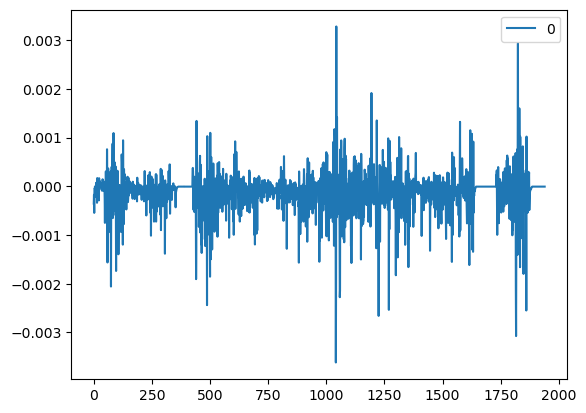

In [10]:
s_D.plot()

<Axes: >

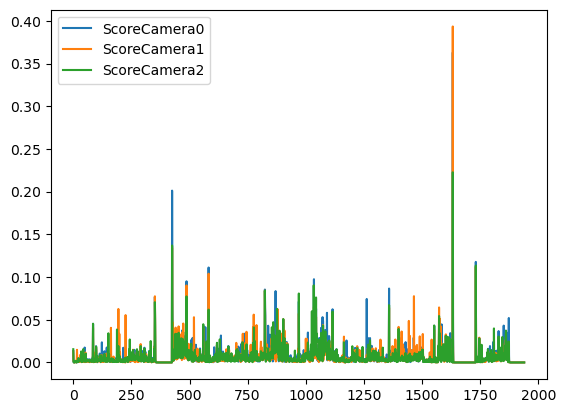

In [11]:
anomaly_score[anomaly_score.columns[:3]].plot()

In [12]:
anomaly_score

,ScoreCamera0,ScoreCamera1,ScoreCamera2,ScoreCamera3,ScoreCamera4,ScoreCamera5,ScoreCamera6,ScoreCamera7,ScoreCamera8,ScoreCamera9,...,ScoreCamera32,ScoreCamera33,ScoreCamera34,ScoreCamera35,ScoreCamera36,ScoreCamera37,ScoreCamera38,ScoreCamera39,ScoreCamera40,ScoreCamera41
0,0.013343,0.012990,0.015503,0.016340,0.016444,0.013505,0.014572,0.021033,0.014140,0.016866,...,0.030532,0.025400,0.008739,0.020413,0.023103,0.018360,0.012765,0.016197,0.019409,0.021136
1,0.000940,0.001725,0.001079,0.001160,0.001276,0.000978,0.001140,0.001575,0.001161,0.000415,...,0.003629,0.005046,0.000653,0.000553,0.000639,0.001615,0.001819,0.001487,0.001548,0.000638
2,0.000128,0.001253,0.000368,0.000187,0.001038,0.000849,0.000348,0.001381,0.000387,0.000895,...,0.001629,0.001431,0.000609,0.000660,0.000712,0.001360,0.001201,0.001131,0.001344,0.003595
3,0.000158,0.000068,0.000077,0.000141,-0.000065,0.000522,0.000066,0.005814,0.015981,0.001073,...,0.000815,0.000942,0.000686,0.001071,0.001156,0.000087,0.000020,0.000781,0.000053,0.001207
4,0.000445,0.000467,0.000835,0.000880,0.000231,0.000586,0.000896,0.000332,0.000837,0.000289,...,0.001237,0.001067,0.000530,0.000420,0.000290,0.000556,0.000434,0.000472,0.000290,0.000282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,...,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005
1936,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,...,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005
1937,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,...,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005
1938,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,...,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005


<Axes: >

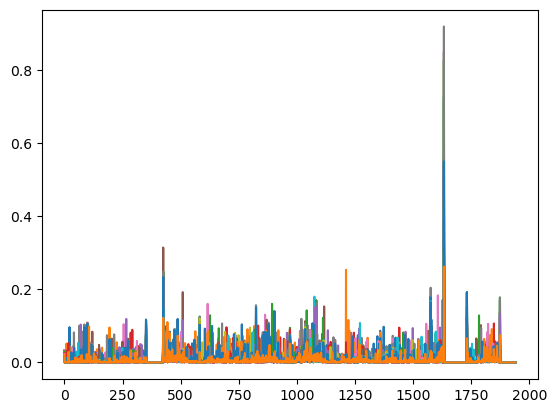

In [13]:
anomaly_score.plot(legend=False)

<Axes: title={'center': 'MSE loss'}>

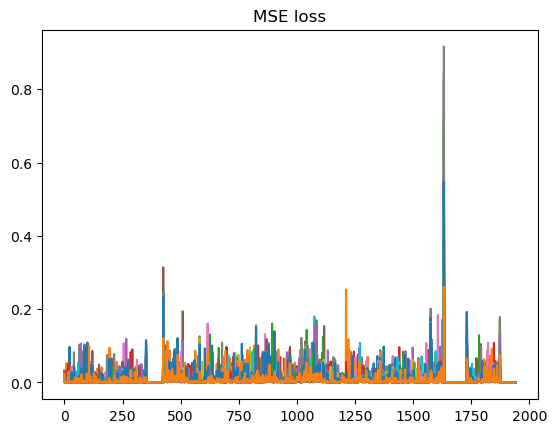

In [14]:
pd.DataFrame(result[:, :, 0].numpy()).plot(legend=False, title="MSE loss")

<Axes: title={'center': 'Real score'}>

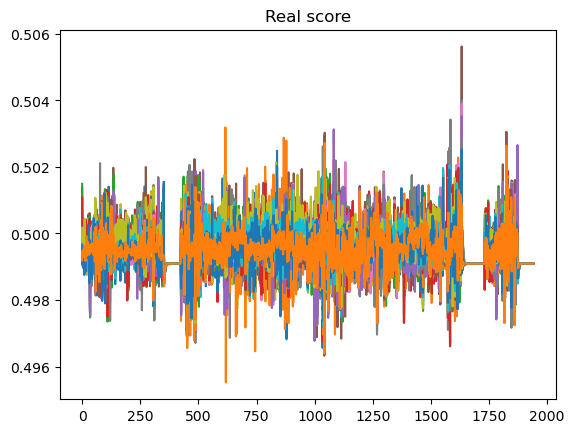

In [15]:
pd.DataFrame(result[:, :, 1].numpy()).plot(legend=False, title="Real score")

<Axes: title={'center': 'Fake score'}>

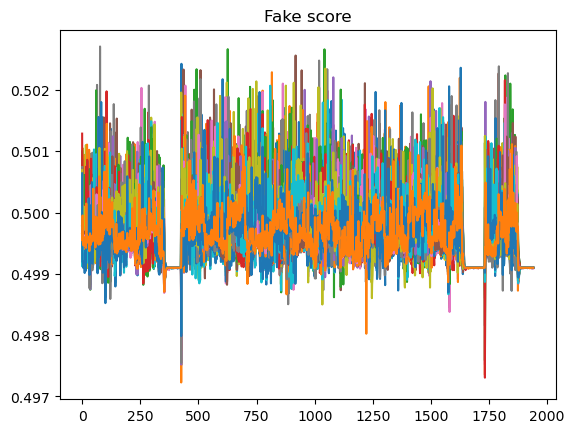

In [16]:
pd.DataFrame(result[:, :, 2].numpy()).plot(legend=False, title="Fake score")

## Selecting the top K% anomaly scores

In [17]:
K = 0.001

In [18]:
# Step 1: Flatten the DataFrame to get all values in a single array
flat_anomaly_score = anomaly_score.values.flatten()

# Step 2: Get the original coordinates
coordinates = [(i, j) for i in range(anomaly_score.shape[0]) for j in range(anomaly_score.shape[1])]

# Step 3: Sort the array while keeping track of the original coordinates
sorted_indices = np.argsort(flat_anomaly_score)[::-1]
sorted_coordinates = [coordinates[i] for i in sorted_indices]

# Print sorted coordinates
# for coord in sorted_coordinates:
#     print(coord)
#     print(anomaly_score.iloc[coord])

In [19]:
sorted_coordinates[:20]

[(1632, 27),
 (1632, 5),
 (1632, 12),
 (1632, 7),
 (1632, 22),
 (1632, 37),
 (1632, 16),
 (1632, 40),
 (1632, 34),
 (1632, 20),
 (1632, 28),
 (1632, 4),
 (1632, 17),
 (1632, 31),
 (1632, 39),
 (1632, 21),
 (1632, 26),
 (1632, 25),
 (1632, 1),
 (1632, 32)]

In [20]:
pd.Series([x[0] for x in sorted_coordinates[:20]]).nunique()

1

In [21]:
len(sorted_coordinates)

81480

<Axes: >

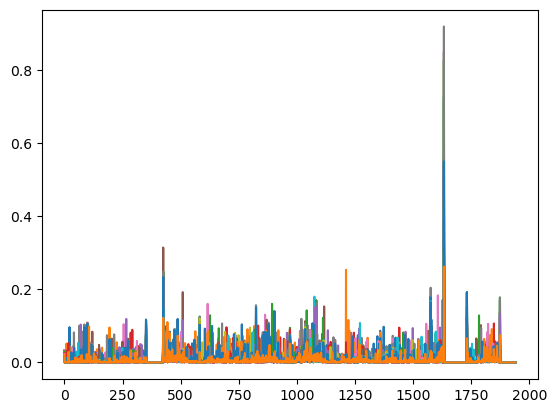

In [22]:
anomaly_score.plot(legend=False)

<Axes: >

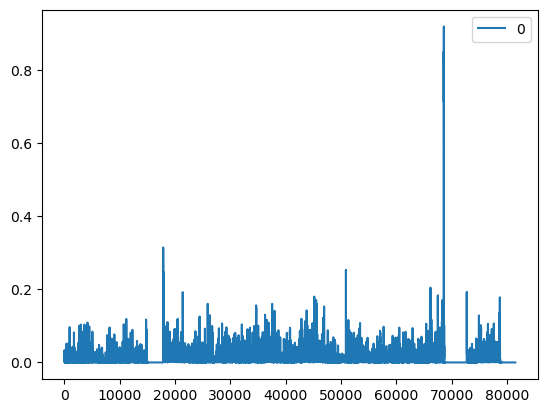

In [23]:
pd.DataFrame(flat_anomaly_score).plot()

In [24]:
head = int(np.floor(K * len(flat_anomaly_score)))

In [25]:
anomalies = sorted_coordinates[:head]
anomalies

[(1632, 27),
 (1632, 5),
 (1632, 12),
 (1632, 7),
 (1632, 22),
 (1632, 37),
 (1632, 16),
 (1632, 40),
 (1632, 34),
 (1632, 20),
 (1632, 28),
 (1632, 4),
 (1632, 17),
 (1632, 31),
 (1632, 39),
 (1632, 21),
 (1632, 26),
 (1632, 25),
 (1632, 1),
 (1632, 32),
 (1632, 29),
 (1632, 33),
 (1632, 18),
 (1632, 30),
 (1632, 11),
 (1632, 0),
 (1632, 3),
 (425, 5),
 (1632, 38),
 (1632, 14),
 (1632, 41),
 (1632, 36),
 (1211, 11),
 (425, 22),
 (425, 12),
 (425, 27),
 (1632, 15),
 (425, 40),
 (425, 20),
 (425, 37),
 (1632, 19),
 (1632, 6),
 (1632, 8),
 (425, 16),
 (425, 34),
 (1632, 2),
 (425, 31),
 (1632, 9),
 (1632, 23),
 (1632, 10),
 (1575, 7),
 (425, 0),
 (509, 5),
 (1731, 37),
 (1731, 20),
 (1731, 40),
 (1731, 7),
 (1606, 26),
 (1632, 35),
 (1632, 13),
 (425, 28),
 (425, 7),
 (1075, 9),
 (1573, 7),
 (1873, 22),
 (1731, 39),
 (1575, 20),
 (1873, 27),
 (1626, 31),
 (1628, 40),
 (1083, 5),
 (1873, 12),
 (1083, 12),
 (1575, 39),
 (1575, 40),
 (1575, 21),
 (1083, 27),
 (616, 26),
 (893, 32),
 (1083, 

In [26]:
minutes = pd.Series([minutes for minutes, camera_nums in anomalies])
camera_nums = pd.Series([camera_nums for minutes, camera_nums in anomalies])

In [27]:
minutes

0     1632
1     1632
2     1632
3     1632
4     1632
      ... 
76    1083
77     616
78     893
79    1083
80     824
Length: 81, dtype: int64

In [28]:
camera_nums

0     27
1      5
2     12
3      7
4     22
      ..
76    27
77    26
78    32
79    22
80    37
Length: 81, dtype: int64

In [ ]:
raw_path = "../traffic_data/dataset3/dens_0501"
raw = pd.read_pickle(raw_path)
camera_ids = raw.columns.map(lambda x: x[4:])
assert(len(camera_ids) == total_number_of_cameras)
camera_ids

Index(['Cam2', 'Cam4', 'Cam5', 'Cam7', 'Cam10', 'Cam14', 'Cam15', 'Cam16',
       'Cam17', 'Cam20', 'Cam23', 'Cam24', 'Cam25', 'Cam27', 'Cam29', 'Cam30',
       'Cam44', 'Cam45', 'Cam46', 'Cam49', 'Cam51', 'Cam72', 'Cam73', 'Cam79',
       'Cam80', 'Cam81', 'Cam88', 'Cam93', 'Cam94', 'Cam95', 'Cam96', 'Cam98',
       'Cam99', 'Cam103', 'Cam104', 'Cam105', 'Cam111', 'Cam112', 'Cam113',
       'Cam114', 'Cam115', 'Cam116'],
      dtype='object')

In [30]:
divmod(1632, truncation_t2-truncation_t1)

(8, 80)

In [31]:
(divmod(1632, truncation_t2-truncation_t1)[1] + truncation_t1 + 1)*5

695

In [32]:
divmod((divmod(1632, truncation_t2-truncation_t1)[1] + truncation_t1 + 1)*5, 60)

(11, 35)

In [33]:
day_tmp, tmp = divmod(minutes, truncation_t2-truncation_t1)
tmp

0      80
1      80
2      80
3      80
4      80
     ... 
76    113
77     34
78    117
79    113
80     48
Length: 81, dtype: int64

In [34]:
day_tmp, tmp = divmod(minutes, truncation_t2-truncation_t1)
days = day_tmp + 1
clock_hour, clock_min = divmod((tmp + truncation_t1 + 1)*5, 60) # We add 1, because we excluded timestamp 58, so we start from timestamp 59

for i, day in enumerate(days):
    print(f"Anomaly at: camera id {camera_ids[camera_nums[i]]}, camera #{camera_nums[i]}, day #{day} of test, at {clock_hour[i]}:{clock_min[i]}.")

Anomaly at: camera id Cam93, camera #27, day #9 of test, at 11:35.
Anomaly at: camera id Cam14, camera #5, day #9 of test, at 11:35.
Anomaly at: camera id Cam25, camera #12, day #9 of test, at 11:35.
Anomaly at: camera id Cam16, camera #7, day #9 of test, at 11:35.
Anomaly at: camera id Cam73, camera #22, day #9 of test, at 11:35.
Anomaly at: camera id Cam112, camera #37, day #9 of test, at 11:35.
Anomaly at: camera id Cam44, camera #16, day #9 of test, at 11:35.
Anomaly at: camera id Cam115, camera #40, day #9 of test, at 11:35.
Anomaly at: camera id Cam104, camera #34, day #9 of test, at 11:35.
Anomaly at: camera id Cam51, camera #20, day #9 of test, at 11:35.
Anomaly at: camera id Cam94, camera #28, day #9 of test, at 11:35.
Anomaly at: camera id Cam10, camera #4, day #9 of test, at 11:35.
Anomaly at: camera id Cam45, camera #17, day #9 of test, at 11:35.
Anomaly at: camera id Cam98, camera #31, day #9 of test, at 11:35.
Anomaly at: camera id Cam114, camera #39, day #9 of test, at 1

## Plotting the anomalies for a specific camera

In [35]:
# Choose the camera
camera_num = 12

In [36]:
minutes[camera_nums == camera_num]

2     1632
34     425
71    1873
72    1083
dtype: int64

In [37]:
# Read again, all the training data
data = torch.tensor(np.load("STGAN/ximantis_smooth_3_truncated/data/data.npy"), dtype=torch.float)
df = pd.DataFrame(data[train_time*day_length:, camera_num, 0, 0])
df.columns = ["Flow"]

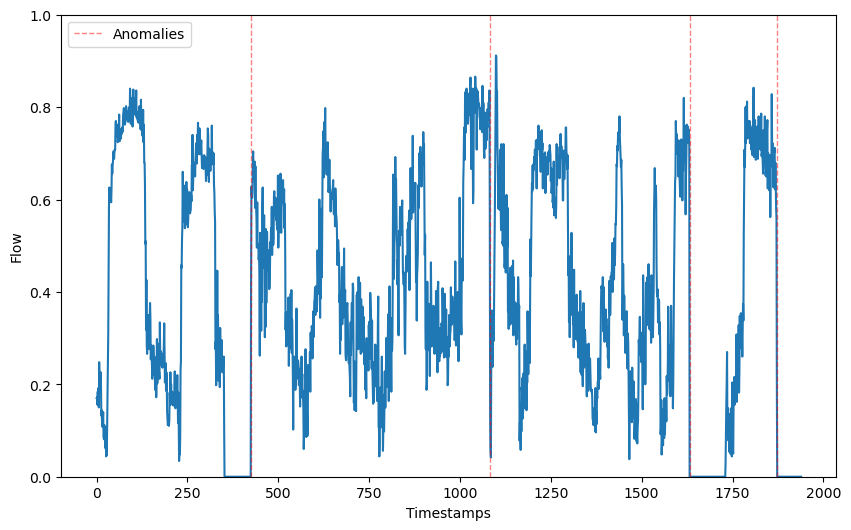

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(df["Flow"])

for i, time in enumerate(minutes[camera_nums == camera_num]):
    if i == 0:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5, label="Anomalies")
    else:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5)


plt.xlabel("Timestamps")
plt.ylabel("Flow")
plt.ylim([0,1])
plt.legend()
plt.show()

## Notes 

Previously, I was filling the NaN values in the flow curves with zeros. Now, I have implemented a different approach using the "ffill" (forward fill) method in pandas. This method propagates the last valid observation to the next valid one. Additionally, I set a limit of 10 as the maximum number of consecutive NaN values to fill using this method. Beyond this limit, I revert to filling the NaN values with zeros. 

As a result, I was able to identify a correct anomaly. On November 22, 2020, at 11:25, the signal from the camera is apparently cut (the are no photos in the folder until 8pm). The algorithm flagged this as an anomaly because, with the new approach, if we don't have data for 10 consecutive minutes, the value is set to zero. This caused a clear spike in the data at November 22, 11:35, exactly 10 minutes after the NaN values started being filled with zeros due to reaching the maximum limit.

Also, in day #6 of test, the anomaly we catch is heavy snowfall! See the figure above.

## Extra plot

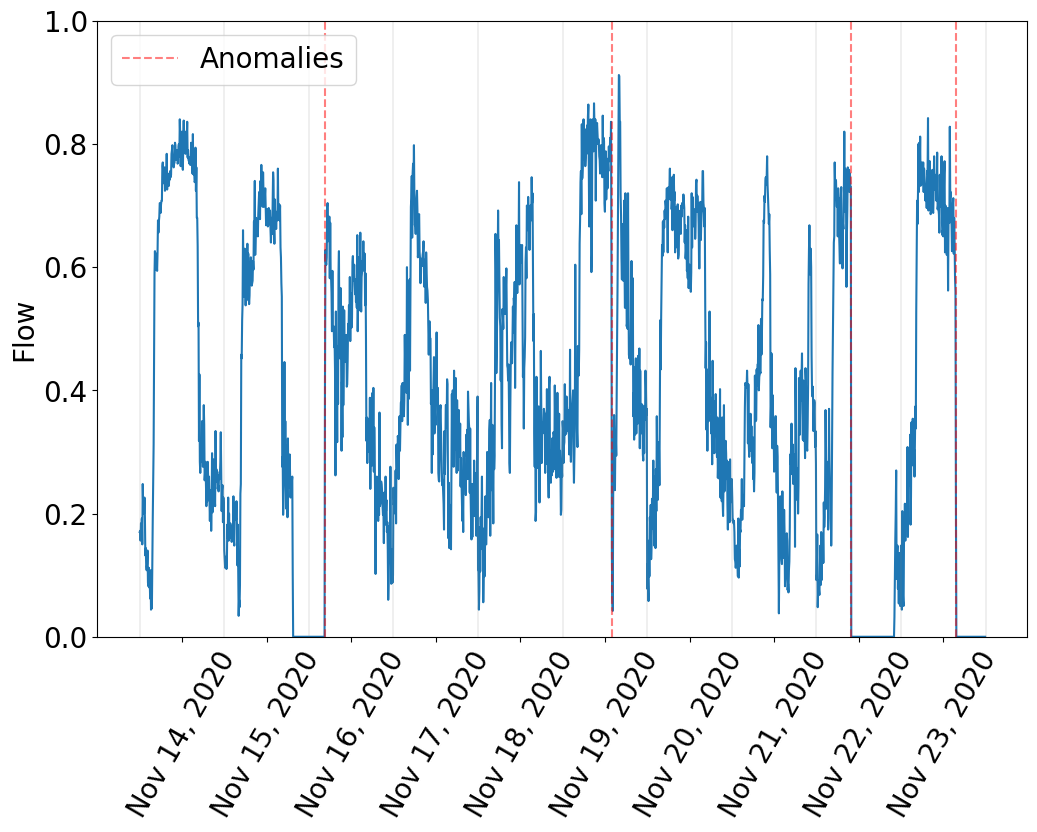

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Assuming df and other variables are already defined
start_date = datetime(2020, 11, 14)

# Create the date labels
date_labels = [start_date + timedelta(days=i) for i in range((len(df) // 194))]

# Set the font size globally
plt.rcParams.update({'font.size': 20})

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(df["Flow"])
# plt.xlabel("Time")
plt.ylabel("Flow")
plt.ylim([0, 1])

# Calculate tick positions to be in the middle of each interval
interval = 194
tick_positions = np.arange(interval / 2, len(df), interval)
plt.xticks(tick_positions, [date.strftime('%b %d, %Y') for date in date_labels], rotation=60)

# Adding vertical lines to indicate day borders
for i in range(0, len(df)+1, interval):
    plt.axvline(x=i, color='grey', linestyle='-', linewidth=0.35, alpha=0.5)

# Adding anomaly vertical lines
for i, time in enumerate(minutes[camera_nums == camera_num]):
    if i == 0:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1.5, alpha=0.5, label="Anomalies")
    else:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1.5, alpha=0.5)

# Adding legend and showing the plot
plt.legend()
plt.savefig("plots/anomalies.pdf", bbox_inches='tight')


Anomalies:

- day #9 of test, at 11:35: signal cut/restart, camera out of order

- day #3 of test, at 8:00: signal cut/restart, camera out of order

- day #7 of test, at 8:50: signal cut/restart, camera out of order

- day #9 of test, at 6:50: visual artifacts

- day #9 of test, at 19:50: signal cut/restart, camera out of order

- day #10 of test, at 15:30: signal cut/restart, camera out of order

- day #6 of test, at 14:20: extreme weather conditions

- day #9 of test, at 11:5: signal cut/restart, camera out of order

- camera id Cam16, camera #7, day #9 of test, at 6:40: visual artifacts

- camera id Cam112, camera #37, day #5 of test, at 8:55:  extreme weather conditions

False positives:

-  camera id Cam14, camera #5, day #3 of test, at 15:00

- camera id Cam88, camera #26, day #9 of test, at 9:25

- camera id Cam115, camera #40, day #9 of test, at 11:15

- camera id Cam20, camera #9, day #6 of test, at 13:40

- camera id Cam88, camera #26, day #4 of test, at 7:45

- camera id Cam99, camera #32, day #5 of test, at 14:40